<a href="https://colab.research.google.com/github/JAmanOG/AIPrac/blob/main/AIPrac8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [55]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.shape

(768, 9)

In [57]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [58]:
x=df.drop('Outcome', axis=1).values
y=df ['Outcome'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neighbors =  np.arange(1,9)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))
for i,k in enumerate (neighbors):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i]= knn.score(x_train, y_train)
    test_accuracy [1] = knn.score(x_test, y_test)


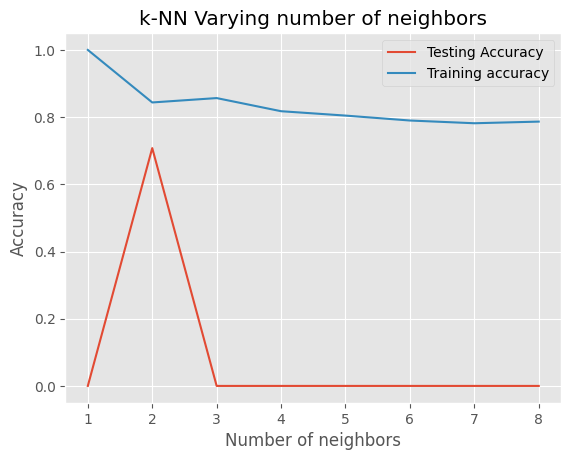

In [62]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [63]:
knn=KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
knn.score(x_test,y_test)

0.6753246753246753

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
y_pred = knn.predict(x_test)

In [68]:
confusion_matrix(y_test,y_pred)

array([[78, 22],
       [28, 26]])

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



In [71]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [72]:
from sklearn.metrics import roc_curve

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

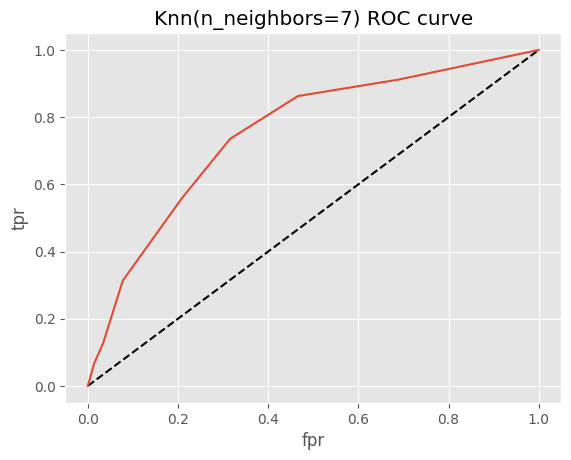

In [77]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7536645726251665

In [79]:
param_grid = {'n_neighbors' : np.arange(1,50)}

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

In [81]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [82]:
knn_cv.best_score_

0.7578558696205755

In [83]:
knn_cv.best_params_

{'n_neighbors': 14}

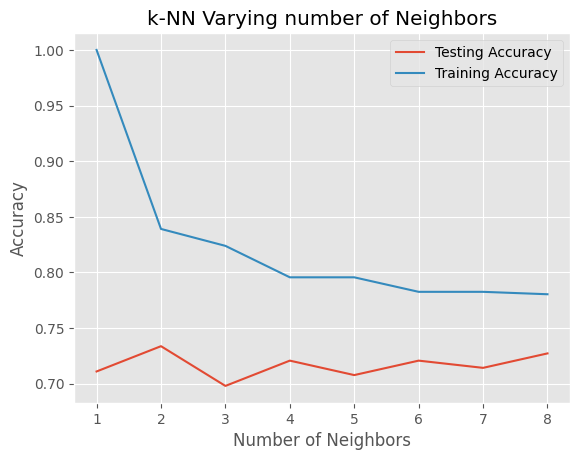

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



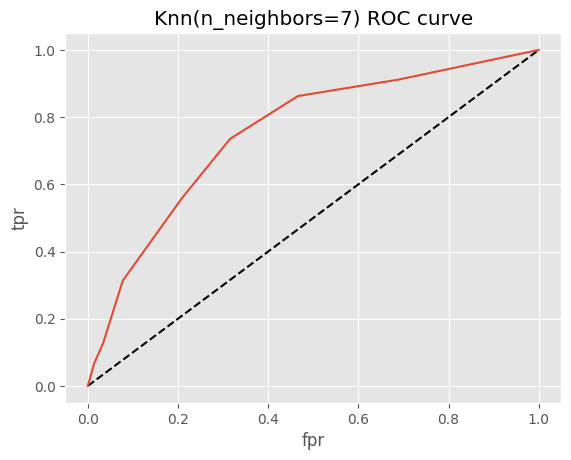

{'n_neighbors': 14}

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')



df = pd.read_csv('diabetes.csv')
df.head()


df.shape


df.dtypes


x = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  #setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors = k)

  #fit the model
  knn.fit(x_train, y_train)

  #compute accuracy on training set
  train_accuracy[i] = knn.score(x_train, y_train)

  #compute accuracy on test set
  test_accuracy[i] = knn.score(x_test, y_test)




plt.title('k-NN Varying number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

confusion_matrix(y_test, y_pred)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

y_pred_proba = knn.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)


param_grid = {'n_neighbors' : np.arange(1,50)}


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)

knn_cv.best_score_

knn_cv.best_params_